In [1]:
import pandas as pd
import pandas_datareader.data as web
import datetime
import backtrader as bt
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pyfolio as pf
import quantstats
import math
plt.rcParams["figure.figsize"] = (10, 6) # (w, h)

C:\ProgramData\Anaconda3\lib\site-packages\pyfolio\pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


In [36]:
SWAN = pd.read_excel('SWANXT.xlsx')

In [37]:
SWAN.head()

,Date,Total Return
0,2005-12-06,1000.000000
1,2005-12-07,996.306829
2,2005-12-08,997.306399
3,2005-12-09,994.928419
4,2005-12-10,994.928419


In [38]:
SWAN = SWAN.set_index(' Date')

In [39]:
SWAN['SWAN_Return'] = SWAN['Total Return'].pct_change()

In [40]:
SWAN.head()

,Total Return,SWAN_Return
Date,,
2005-12-06,1000.000000,NaN
2005-12-07,996.306829,-0.003693
2005-12-08,997.306399,0.001003
2005-12-09,994.928419,-0.002384
2005-12-10,994.928419,0.000000


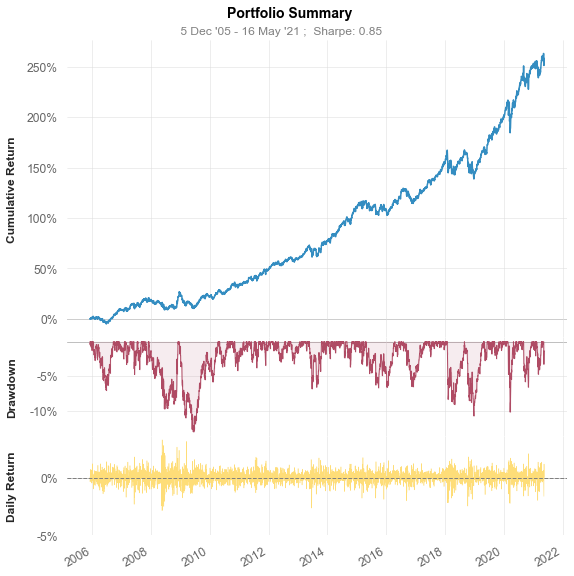

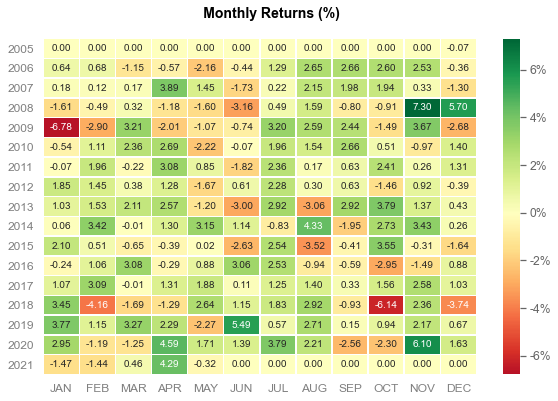

In [41]:
quantstats.reports.plots(SWAN['SWAN_Return'], mode='basic')

In [42]:
quantstats.reports.metrics(SWAN['SWAN_Return'], mode='full')

                           Strategy
-------------------------  ----------
Start Period               2005-12-06
End Period                 2021-05-16
Risk-Free Rate             0.0%
Time in Market             69.0%

Cumulative Return          258.37%
CAGR%                      8.61%
Sharpe                     0.85
Sortino                    1.23
Max Drawdown               -13.09%
Longest DD Days            480
Volatility (ann.)          6.97%
Calmar                     0.66
Skew                       -0.18
Kurtosis                   5.71

Expected Daily %           0.02%
Expected Monthly %         0.69%
Expected Yearly %          7.8%
Kelly Criterion            8.83%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.7%
Expected Shortfall (cVaR)  -0.7%

Payoff Ratio               0.99
Profit Factor              1.19
Common Sense Ratio         1.26
CPC Index                  0.64
Tail Ratio                 1.05
Outlier Win Ratio          5.77
Outlier Loss Ratio         3.23



In [27]:
quantstats.reports.html(SWAN['SWAN_Return'], output = 'Report_AssetAllocation_SWAN.html', title='AssetAllocation_SWAN')

In [43]:
start = '2005-12-06'
end = '2021-05-16'

spy = web.DataReader('SPY', 'yahoo', start, end)['Adj Close'].to_frame("spy_Close")

In [44]:
spy_return = spy.pct_change(periods=1)

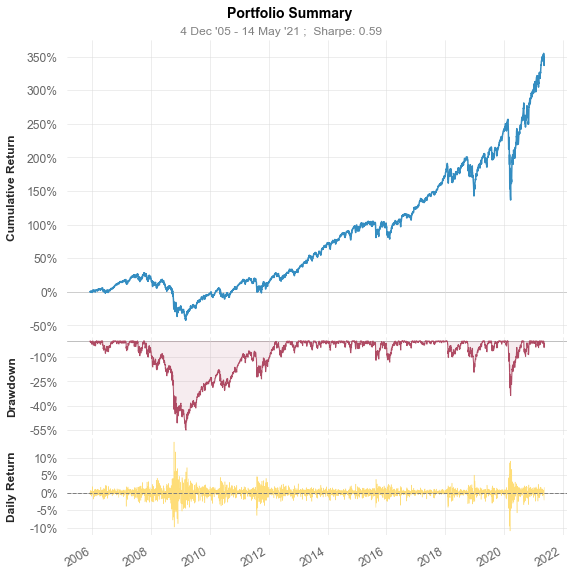

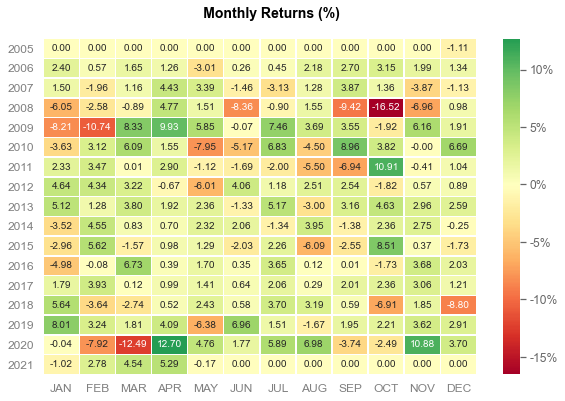

In [46]:
quantstats.reports.plots(spy_return['spy_Close'], mode='basic')

In [47]:
quantstats.reports.metrics(spy_return['spy_Close'], mode='full')

                           Strategy
-------------------------  ----------
Start Period               2005-12-05
End Period                 2021-05-14
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          348.85%
CAGR%                      10.21%
Sharpe                     0.59
Sortino                    0.83
Max Drawdown               -55.19%
Longest DD Days            1772
Volatility (ann.)          19.94%
Calmar                     0.18
Skew                       -0.07
Kurtosis                   15.74

Expected Daily %           0.04%
Expected Monthly %         0.81%
Expected Yearly %          9.23%
Kelly Criterion            6.23%
Risk of Ruin               0.0%
Daily Value-at-Risk        -2.02%
Expected Shortfall (cVaR)  -2.02%

Payoff Ratio               0.9
Profit Factor              1.13
Common Sense Ratio         1.02
CPC Index                  0.56
Tail Ratio                 0.9
Outlier Win Ratio          4.56
Outlier Loss Ratio         

In [48]:
quantstats.reports.html(spy_return['spy_Close'], output = 'Report_AssetAllocation_SPY.html', title='S&P 500 Index')